In [1]:
import nmp_util
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.read_csv('SeaLevel_exclGIA.txt', names = ['date [y]','rise [mm]'], delimiter = r'\s+')
display(data)

,date [y],rise [mm]
0,1993.011526,-37.91
1,1993.038692,-40.95
2,1993.065858,-41.09
3,1993.093025,-43.38
4,1993.120191,-38.66
...,...,...
1173,2024.882992,70.97
1174,2024.910084,67.60
1175,2024.937176,65.14
1176,2024.964267,66.41


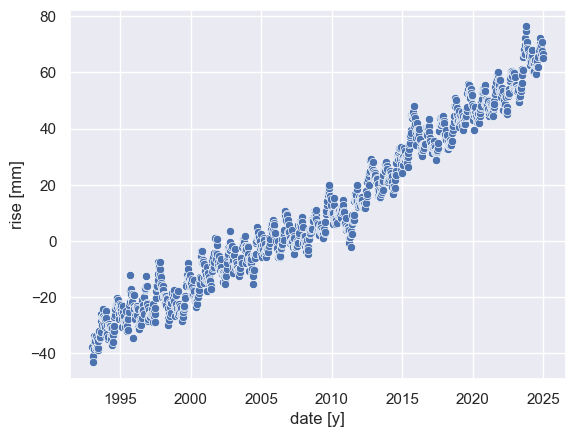

datapoints : 1178


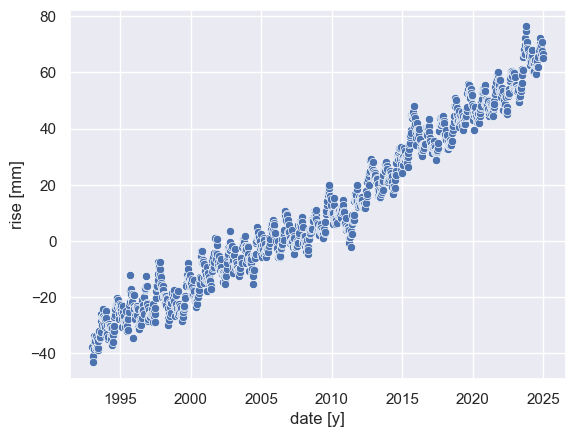

datapoings: 1178


In [3]:
sns.scatterplot(data = data, x = 'date [y]', y = 'rise [mm]')
plt.show()
print(f'datapoints : {len(data)}')
data = data.loc[nmp_util.get_inliers(data['rise [mm]']) & nmp_util.get_inliers(data['date [y]'])]
sns.scatterplot(data = data, x = 'date [y]', y = 'rise [mm]')
plt.show()
print(f'datapoings: {len(data)}')

LinearModelResult(parameters = 
[11.13990662]
m_0 = 29.023724612643935)
 normal_matrix =
 [[1178.]]

mean : 11.139906621392191
standard deviation : 29.023724612643935


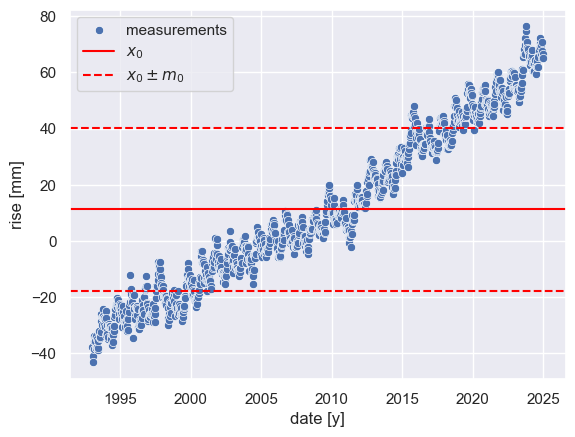

In [4]:
zero_order_fit = nmp_util.poly_fit(data['date [y]'], data['rise [mm]'], 0)
sns.scatterplot(data = data, x='date [y]', y='rise [mm]', label = 'measurements')
plt.axhline(zero_order_fit.parameters[0], color = 'red', label = '$x_0$')
plt.axhline(zero_order_fit.parameters[0]+zero_order_fit.rse, linestyle = '--',color = 'red')
plt.axhline(zero_order_fit.parameters[0]-zero_order_fit.rse, linestyle = '--',color = 'red', label = '$x_0\\pm m_0$')
plt.legend()
offset = zero_order_fit.parameters[0]

display(zero_order_fit)

print(f'mean : {data["rise [mm]"].mean()}')
print(f'standard deviation : {data["rise [mm]"].std()}')
plt.show()

LinearModelResult(parameters = 
[ 3.07378503e+00 -6.16410737e+03]
m_0 = 5.871333313179548)
 normal_matrix =
 [[4.75462431e+09 2.36660704e+06]
 [2.36660704e+06 1.17800000e+03]]

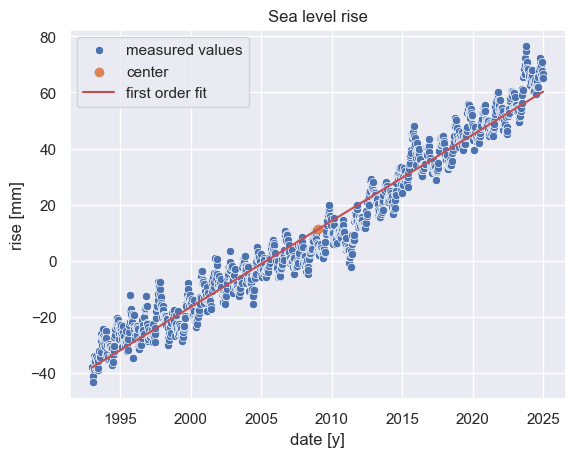

In [5]:
first_order_fit = nmp_util.poly_fit(data['date [y]'], data['rise [mm]'], 1)

display(first_order_fit)

x_center = data['date [y]'].mean()
y_center = data['rise [mm]'].mean()

data['linear fit [mm]'] = np.polyval(first_order_fit.parameters, data['date [y]'])
plt.title('Sea level rise')
sns.scatterplot(data, x = 'date [y]', y = 'rise [mm]', label = 'measured values')
plt.scatter(x_center, y_center, label = 'center')
sns.lineplot(data, x = 'date [y]', y = 'linear fit [mm]', c = 'r', label = 'first order fit')
plt.show()


y_pred = np.polyval(first_order_fit.parameters, x_center)
assert np.isclose(y_pred, y_center)

LinearModelResult(parameters = 
[  3.07378503 -38.01837141]
m_0 = 5.871333313179557)
 normal_matrix =
 [[401942.76188969  18839.460445  ]
 [ 18839.460445     1178.        ]]

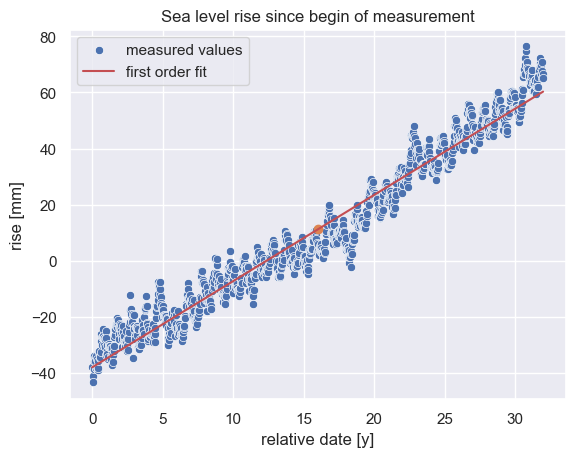

In [6]:
data['relative date [y]'] = data['date [y]'] - data['date [y]'].min()

first_order_fit = nmp_util.poly_fit(data['relative date [y]'], data['rise [mm]'], 1)

display(first_order_fit)

x_center = data['relative date [y]'].mean()
y_center = data['rise [mm]'].mean()

data['linear fit [mm]'] = np.polyval(first_order_fit.parameters, data['relative date [y]'])
plt.title('Sea level rise since begin of measurement')
sns.scatterplot(data, x = 'relative date [y]', y = 'rise [mm]', label = 'measured values')
sns.lineplot(data, x = 'relative date [y]', y = 'linear fit [mm]', c = 'r', label = 'first order fit')
plt.scatter(x_center, y_center, label = 'center')
plt.show()

y_pred = np.polyval(first_order_fit.parameters, x_center)
assert np.isclose(y_pred, y_center)

LinearModelResult(parameters = 
[ 2.43043700e-06 -2.29795224e-04  8.04161984e-03 -1.25868228e-01  8.59157038e-01  4.61899835e-01 -3.25297430e+01]
m_0 = 4.947953583737729)
 normal_matrix =
 [[1.04304659e+20 3.53174921e+18 1.20420988e+17 4.14016947e+15 1.43779776e+14 5.05557317e+12 1.80583577e+11]
 [3.53174921e+18 1.20420988e+17 4.14016947e+15 1.43779776e+14 5.05557317e+12 1.80583577e+11 6.58465473e+09]
 [1.20420988e+17 4.14016947e+15 1.43779776e+14 5.05557317e+12 1.80583577e+11 6.58465473e+09 2.46949365e+08]
 [4.14016947e+15 1.43779776e+14 5.05557317e+12 1.80583577e+11 6.58465473e+09 2.46949365e+08 9.64690435e+06]
 [1.43779776e+14 5.05557317e+12 1.80583577e+11 6.58465473e+09 2.46949365e+08 9.64690435e+06 4.01942762e+05]
 [5.05557317e+12 1.80583577e+11 6.58465473e+09 2.46949365e+08 9.64690435e+06 4.01942762e+05 1.88394604e+04]
 [1.80583577e+11 6.58465473e+09 2.46949365e+08 9.64690435e+06 4.01942762e+05 1.88394604e+04 1.17800000e+03]]

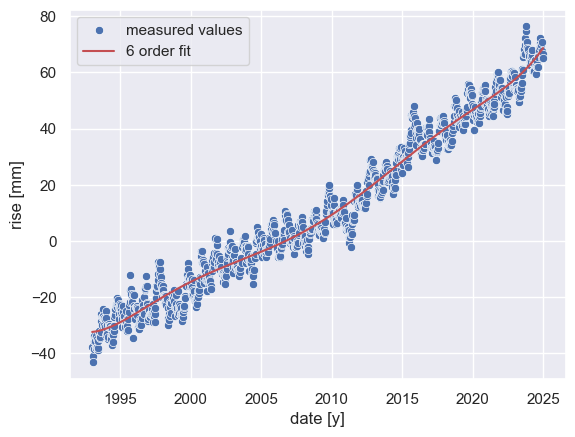

In [7]:
order = 6

poly_fit = nmp_util.poly_fit(data['relative date [y]'], data['rise [mm]'], order)

display(poly_fit)

data['poly fit [mm]'] = np.polyval(poly_fit.parameters, data['relative date [y]'])

sns.scatterplot(data, x = 'date [y]', y = 'rise [mm]', label = 'measured values')
sns.lineplot(data, x = 'date [y]', y = 'poly fit [mm]', c = 'r', label = f'{order} order fit')
plt.show()

In [8]:
m_0_alternative = np.sqrt(((data['rise [mm]']**2).sum() - (data['rise [mm]']*data['poly fit [mm]']).sum()) / (len(data) - order))

print(m_0_alternative)
print(poly_fit.rse)

4.94584223165279
4.947953583737729


# Let's compare the explicit and implicit methods

In [9]:
np.random.seed(1)
x = np.random.random(1000)
y = np.random.random(1000)
degree = 7
direct_polyfit =    nmp_util.poly_fit(x,y,degree, method='direct')
via_design_matrix = nmp_util.poly_fit(x,y,degree, method='design matrix')

assert np.allclose(direct_polyfit.parameters, via_design_matrix.parameters), 'The two methods are not equivalent!'
assert np.allclose(direct_polyfit.normal_matrix, via_design_matrix.normal_matrix), 'The two methods are not equivalent!'
print('The two methods are equivalent!')

The two methods are equivalent!


In [10]:
N = 500_000
test_x = np.random.rand(N)
test_y = np.random.rand(N)
order = 10

In [11]:
%timeit -n 10 -r 10 nmp_util.poly_fit(test_x, test_y, degree, method = 'design matrix')
%timeit -n 10 -r 10 nmp_util.poly_fit(test_x, test_y, degree, method = 'direct')

121 ms ± 2.93 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
317 ms ± 11.9 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


# How fast is the poly fit if we use a P matrix?

In [12]:
import scipy.sparse
diag_elements = np.random.rand(N)
P = scipy.sparse.diags(diag_elements)
%timeit -r 10 nmp_util.poly_fit(test_x, test_y, degree, P = P, method= 'design matrix')


try:
    P = P.todense()
    %timeit -r 10 nmp_util.poly_fit(test_x, test_y, degree, P = 1, method= 'design matrix')
except Exception as e:
    print(e)
    print('P is too large to convert to dense matrix.')

211 ms ± 12.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Unable to allocate 1.82 TiB for an array with shape (500000, 500000) and data type float64
P is too large to convert to dense matrix.
